In [1]:
import pandas as pd

train = pd.read_csv('garbage/ion_ch/train.csv')

In [2]:
train.head()

,time,signal,open_channels
0,0.0001,-2.7600,0
1,0.0002,-2.8557,0
2,0.0003,-2.4074,0
3,0.0004,-3.1404,0
4,0.0005,-3.1525,0


In [3]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import ticker as ticker

# axes[0].labelY([np.arange(0,5000000,500000)])
fig = plt.figure(figsize=(30,5))
axes = fig.add_subplot(111)
ticks = np.arange(0,501,50)

axes.plot(train['time'], train['signal'])
# axes.xaxis.set_major_locator(ticker.MultipleLocator(500000))
yticks=np.arange(-5, 16, 5)
axes.set_yticks(yticks)
axes.set_xticks(ticks)
axes.set_xticklabels(ticks*10000)
axes.grid(True)
plt.show()


<Figure size 3000x500 with 1 Axes>

In [4]:
segm_sep = np.concatenate([[0,500000,600000], np.arange(1000000,5000001, 500000)])

seg_is_shifted = [False,True,False,False,False,False,True,True,True,True]
seg_sig_grp = [0,0,0,1,4,3,1,2,3,4]
signal = np.split(train['signal'], segm_sep[1:-1])
opench=np.split(train['open_channels'], segm_sep[1:-1])

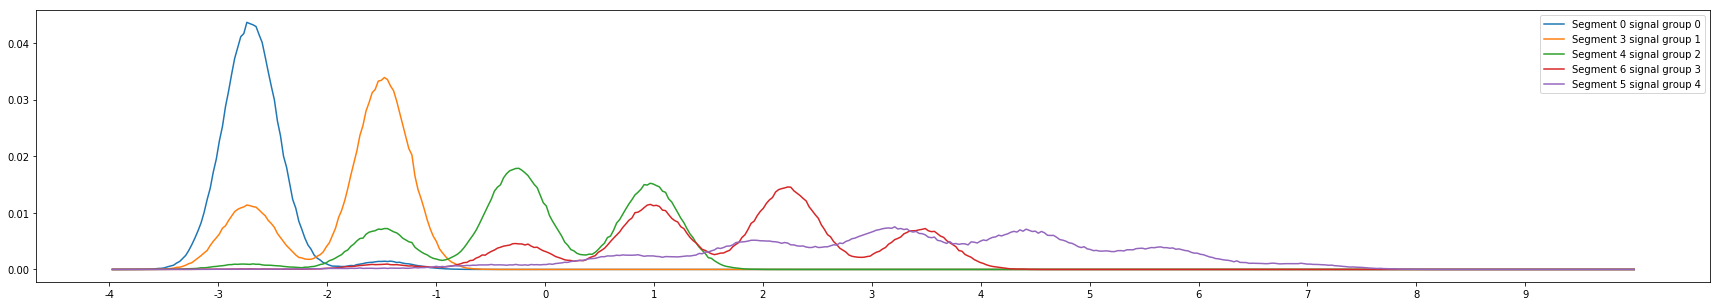

In [45]:
fig = plt.figure(figsize=(30,5))
axes = fig.add_subplot(111)
# axes1 = fig.add_subplot(212)
axes.set_xticks(np.arange(-4,10,1))
axes.set_xticklabels(np.arange(-4,10,1))
clean_hist = []
hist_bins = np.linspace(-4, 10, 500)

for j,i in enumerate([0,3,4,6,5]):
    hist = np.histogram(signal[i], bins=hist_bins)
    clean_hist.append(hist[0])
    clean_hist[-1] = clean_hist[-1]/500000
    axes.plot(hist_bins[1:], clean_hist[-1], label='Segment ' + str(i) + ' signal group ' +str(j))
#     axes1.hist(clean_hist[-1], bins=hist[1])
axes.legend();


No handles with labels found to put in legend.


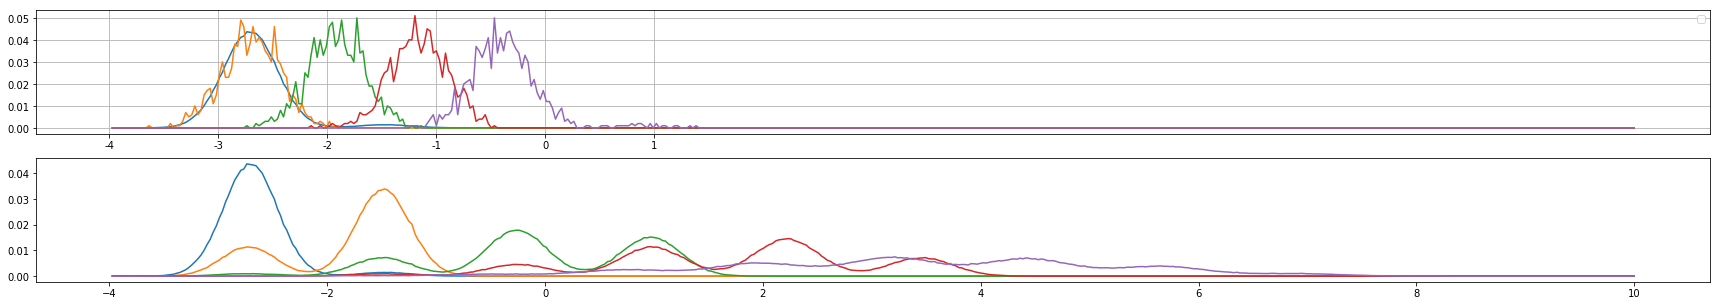

In [51]:
window_size = 1000

fig = plt.figure(figsize=(30,5))

axes1 = fig.add_subplot(212)

axes = fig.add_subplot(211)
axes.set_xticks(np.arange(-4, 2, 1))
axes.set_xticklabels(np.arange(-4, 2, 1))
axes.grid(True)

axes.plot(hist_bins[1:],clean_hist[0])

for i in [0, 25000,50000, 75000]:
    window_hist = np.histogram(signal[1][i:window_size+i], bins=hist_bins)[0]/window_size
    axes.plot(hist_bins[1:],window_hist)
    
for j,i in enumerate([0,3,4,6,5]):
    axes1.plot(hist_bins[1:], clean_hist[j], label='Segment ' + str(i) + ' signal group ' +str(j))
axes.legend();

In [58]:
window_size=1000
bin_width = np.diff(hist_bins)[0]

s_window = 10

sig_shift = [] 

for clean_id in range(len(seg_sig_grp)):
    grp_id = seg_sig_grp[clean_id]
    window_shift = [] 
    prev_s = 0
    window_data = np.array(signal[clean_id]).reshape(-1, window_size)
    
    for w in window_data:
        window_hist=np.histogram(w,bins = hist_bins)[0]/window_size
        window_corr = np.array([np.sum(clean_hist[grp_id]*np.roll(window_hist, -s)) for s in range(prev_s-s_window, prev_s+s_window+1) ])
        prev_s = prev_s + np.argmax(window_corr) - s_window
        window_shift.append(-prev_s*bin_width)
    
    window_shift = np.array(window_shift)
    sig_shift.append(window_shift)
    

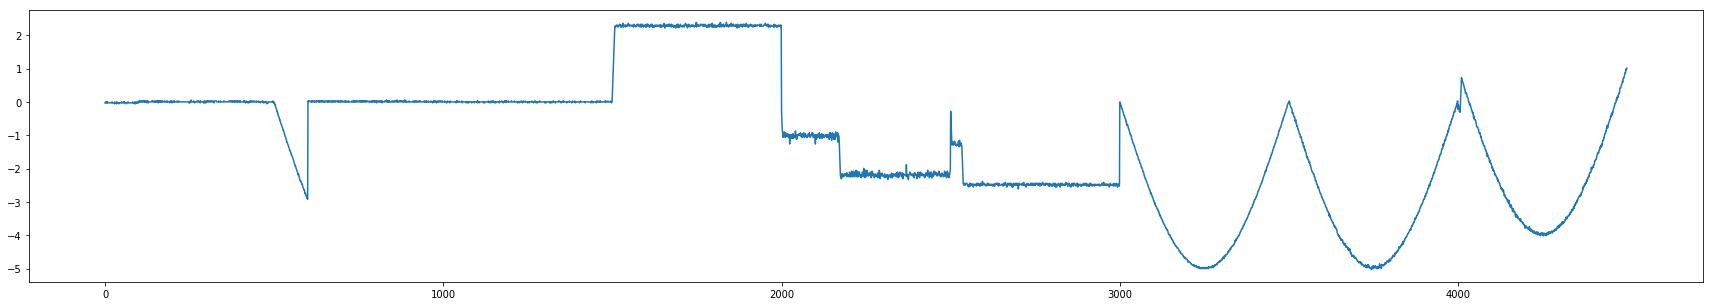

In [68]:
fig = plt.figure(figsize=(30,5))
axes = fig.add_subplot(111)

axes.plot(np.concatenate(sig_shift))